In [7]:
import matplotlib.pyplot as plt
import numpy as np
from process import *
from saliency import *
from utils import *

root = "/home/kavra/Datasets/medical/cvi_eyetracking/asc_data_v1/"
trial = "Freeviewingstillimage_1.jpg"

ids = [i for i in os.listdir(root) if i.endswith('.asc')]
ctrl_ids = [i.split(".")[0] for i in ids if i.startswith("2")]
cvi_ids = [i.split(".")[0] for i in ids if i.startswith("1")]

In [27]:
import math
from collections import Counter

def shannon_entropy(time_series):
    """
    Calculate the Shannon entropy of a time series.

    Parameters:
    - time_series (list or numpy array): The input time series data.

    Returns:
    - entropy (float): The Shannon entropy of the time series.
    """
    # Count the occurrences of each unique value in the time series
    value_counts = Counter(time_series)
    
    # Calculate the total number of data points in the time series
    total_count = len(time_series)
    
    # Calculate the probability of each unique value
    probabilities = [count / total_count for count in value_counts.values()]
    
    # Calculate Shannon entropy
    entropy = -sum(p * math.log(p) for p in probabilities if p > 0)

    # calculate perplexity
    perplexity = entropy
    
    return perplexity

def eye_mov_entropy(time_series):
    # calculate the difference
    sum_diff = np.diff(time_series)
    # calculate the geometric sum
    if len(time_series.shape) == 2:
        sum_diff = np.sqrt(sum(sum_diff**2))
    # calculate the velocity
    velocity = np.diff(sum_diff) * (500 / 2)
    # calculate the entropy
    return shannon_entropy(velocity)


In [28]:
eye_mov_entropy(data.T)

2.7289851552133

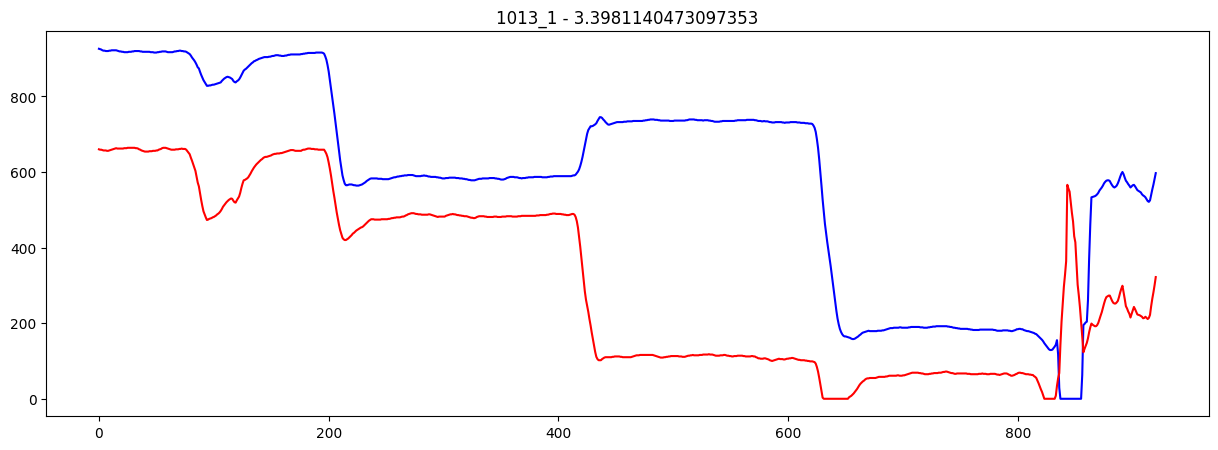

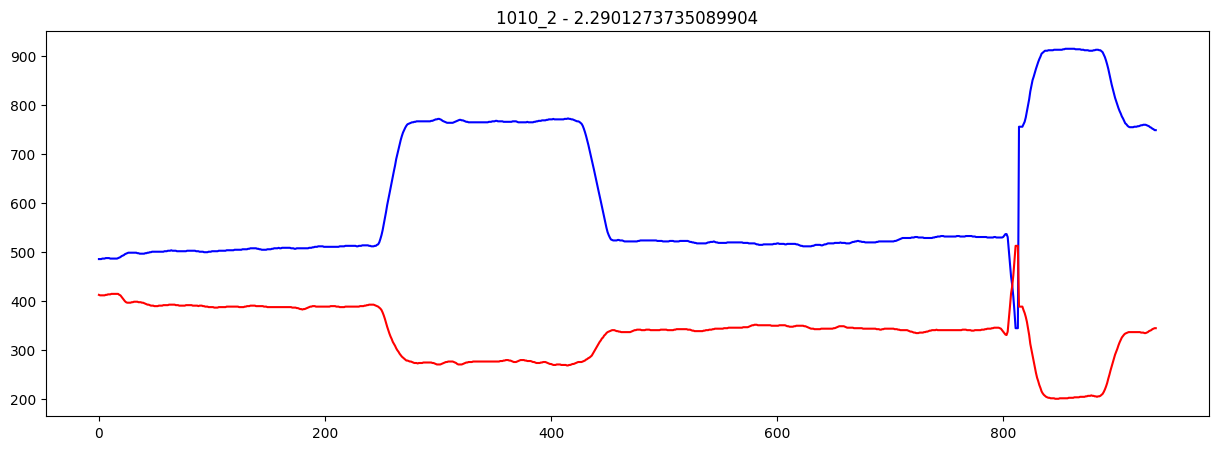

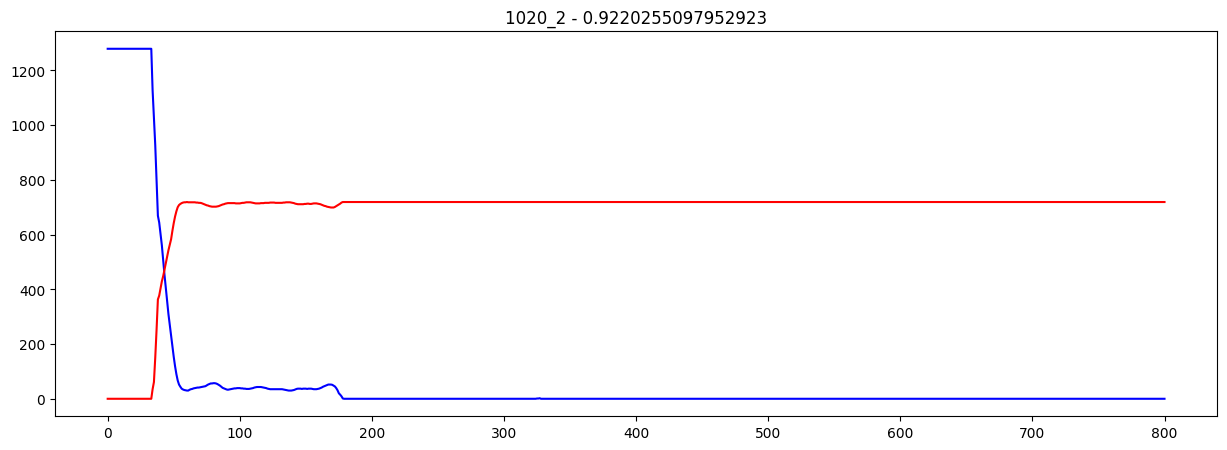

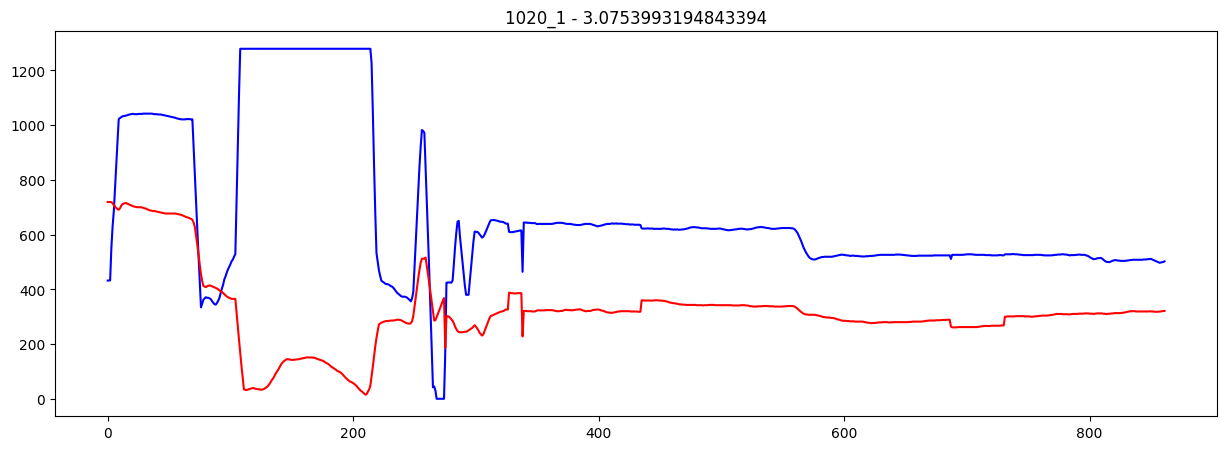

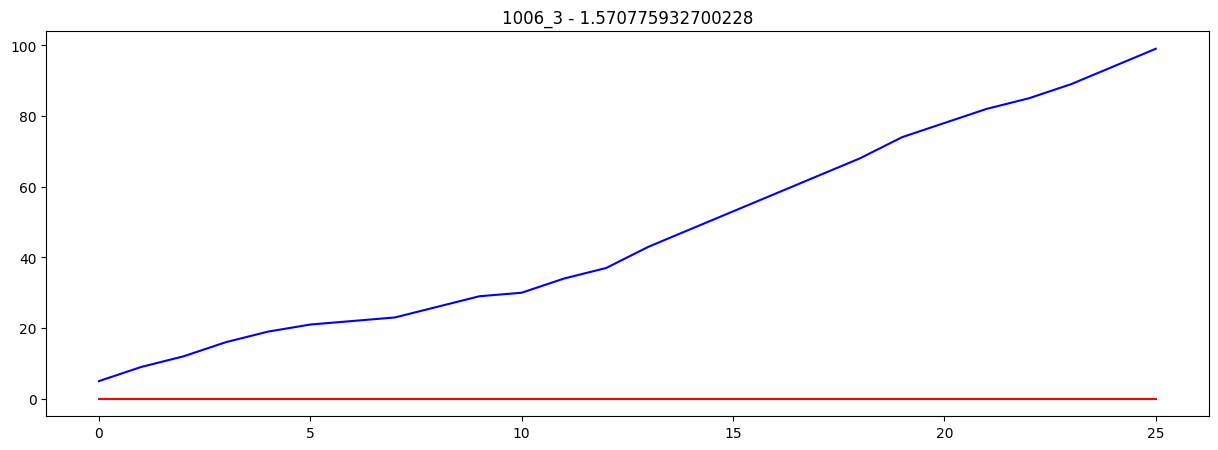

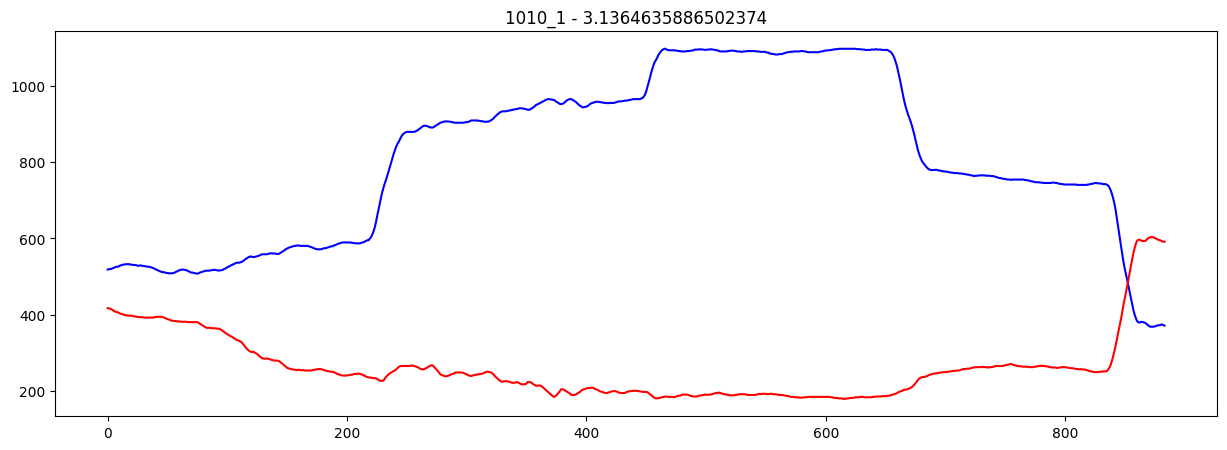

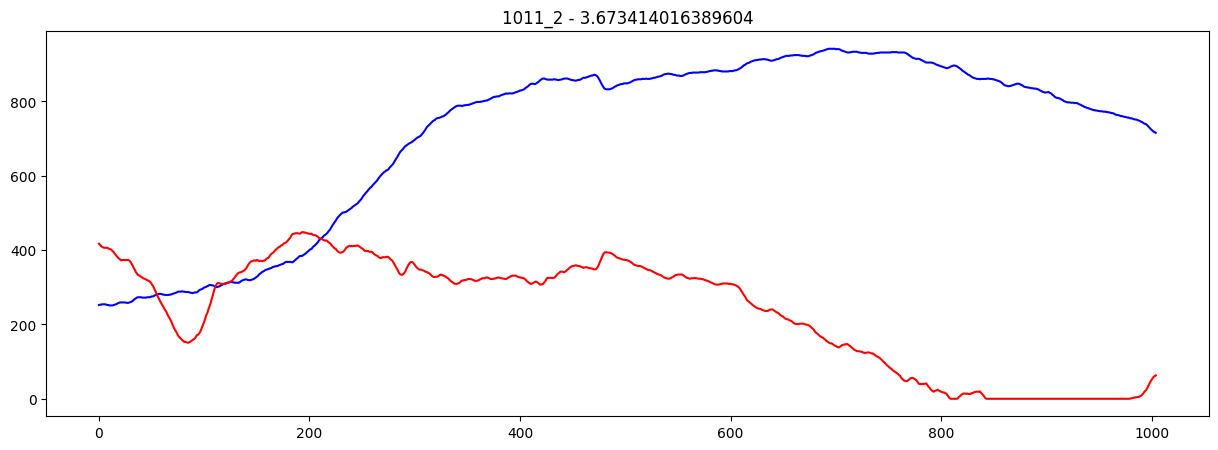

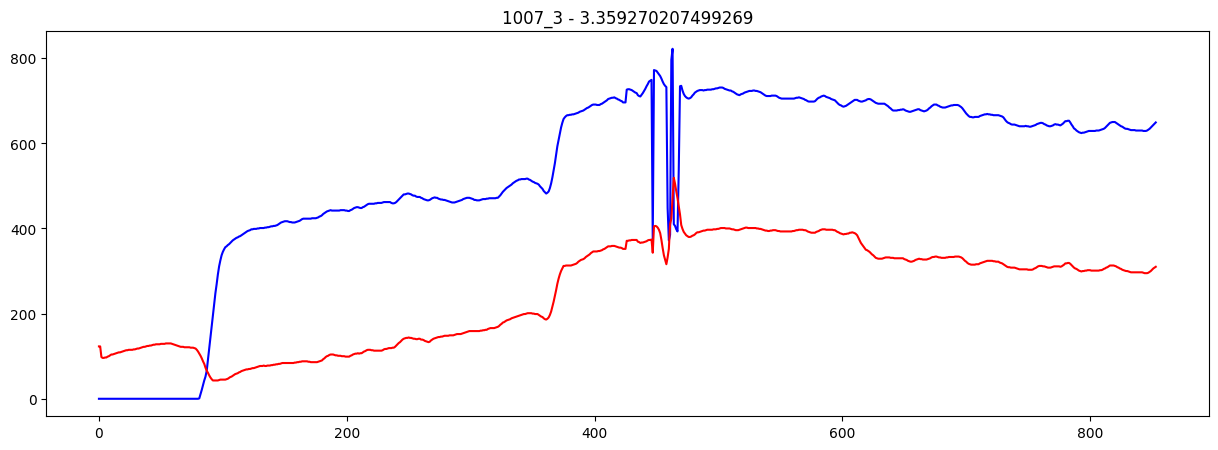

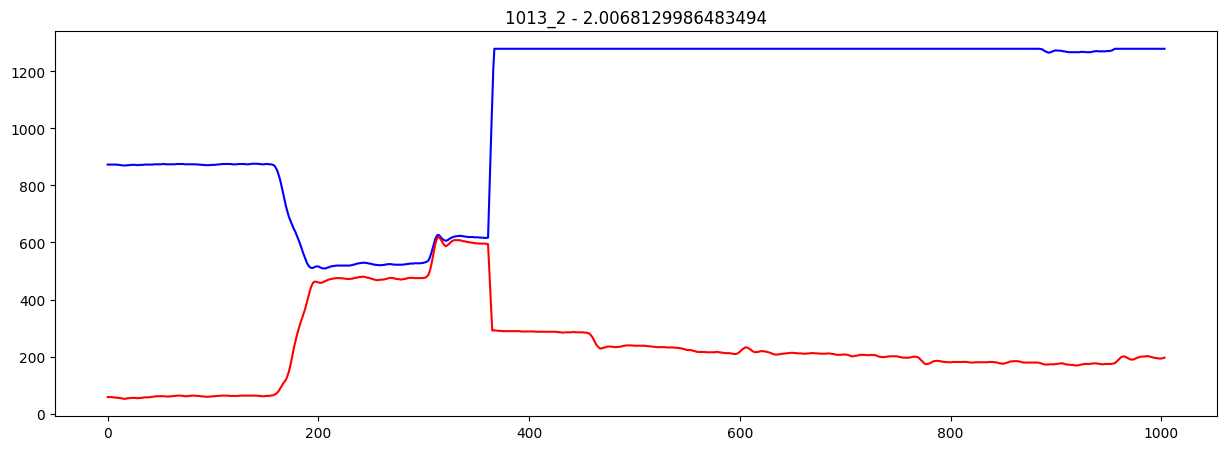

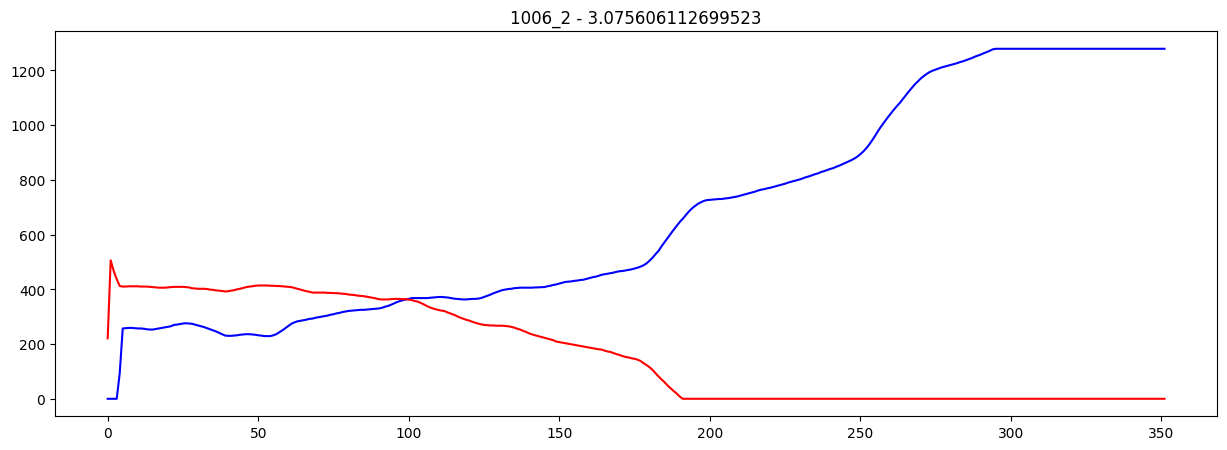

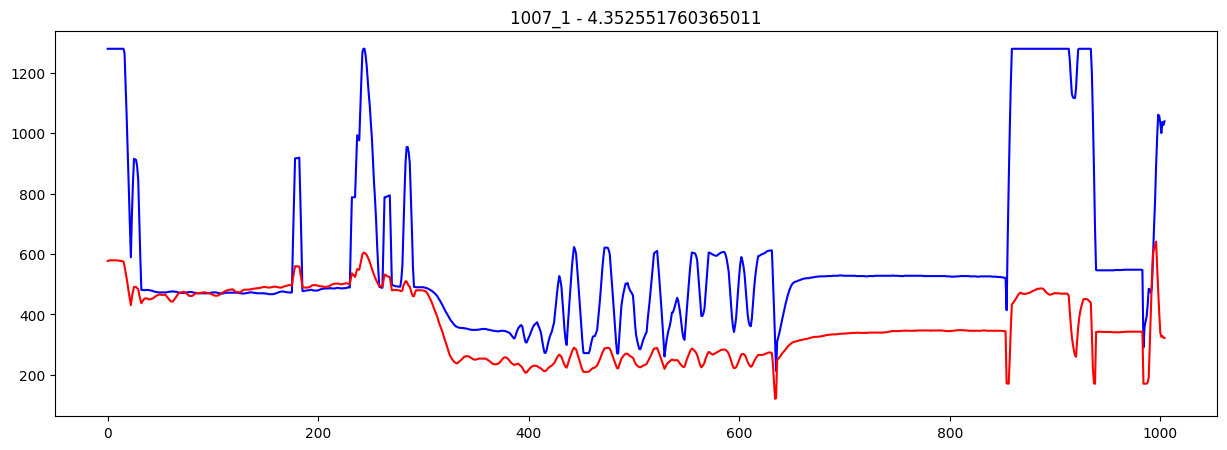

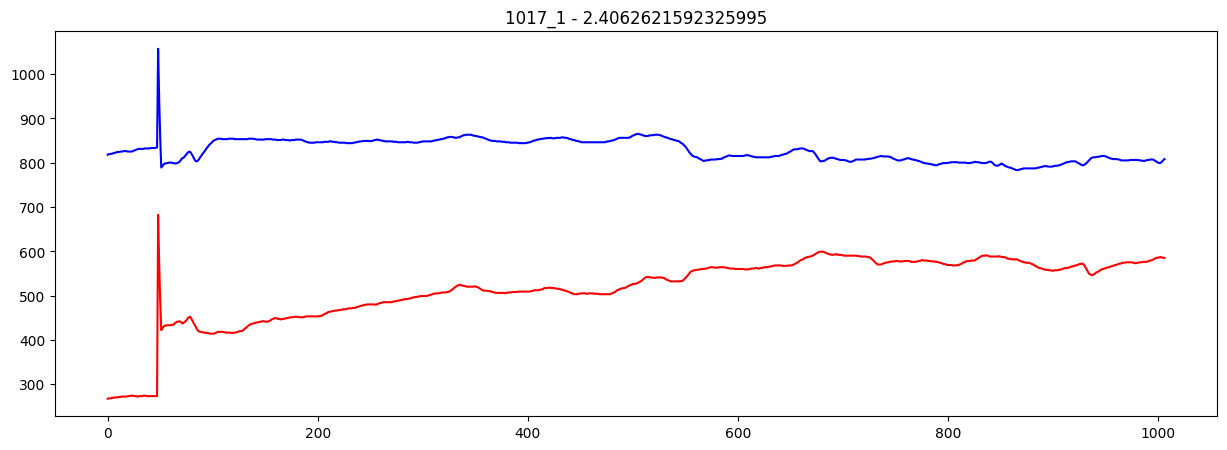

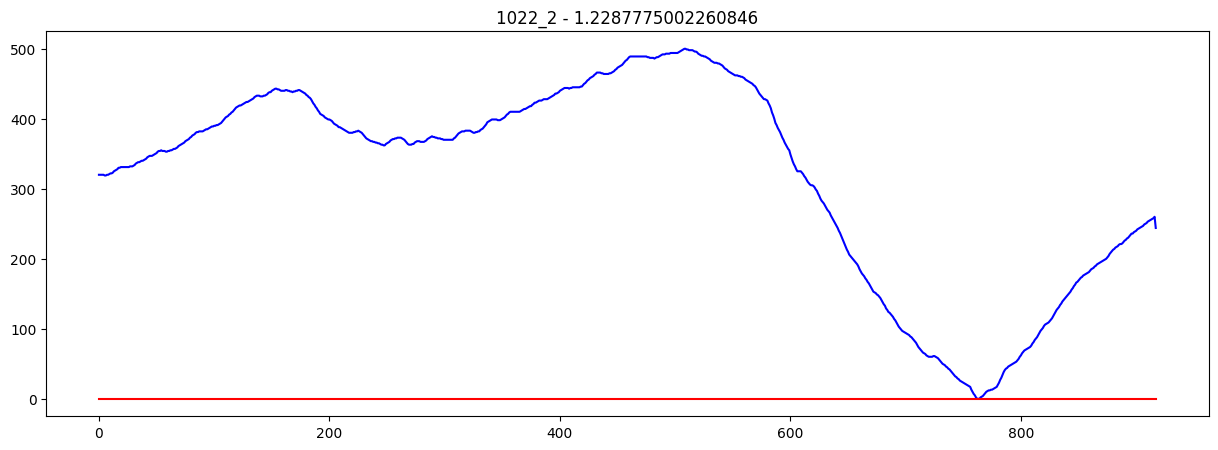

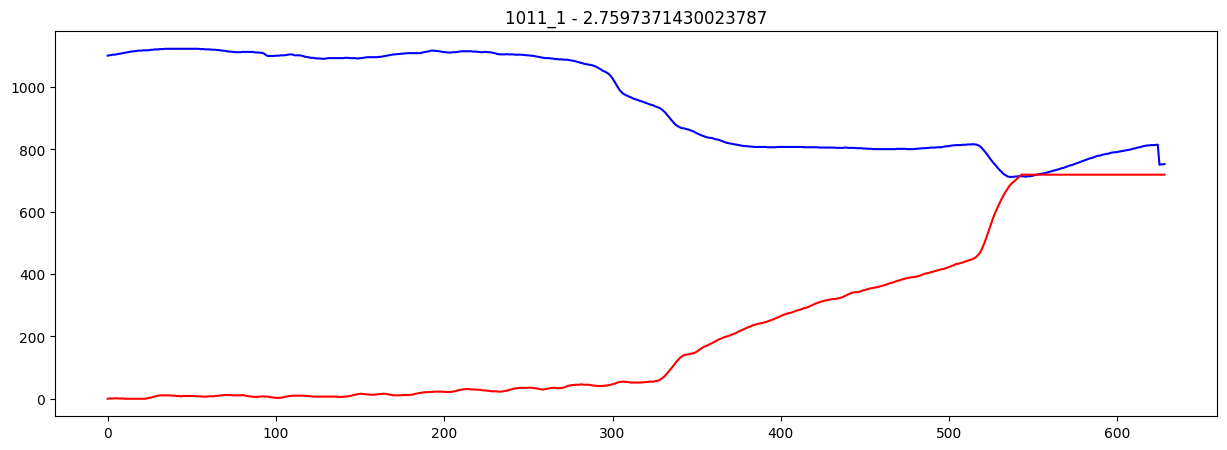

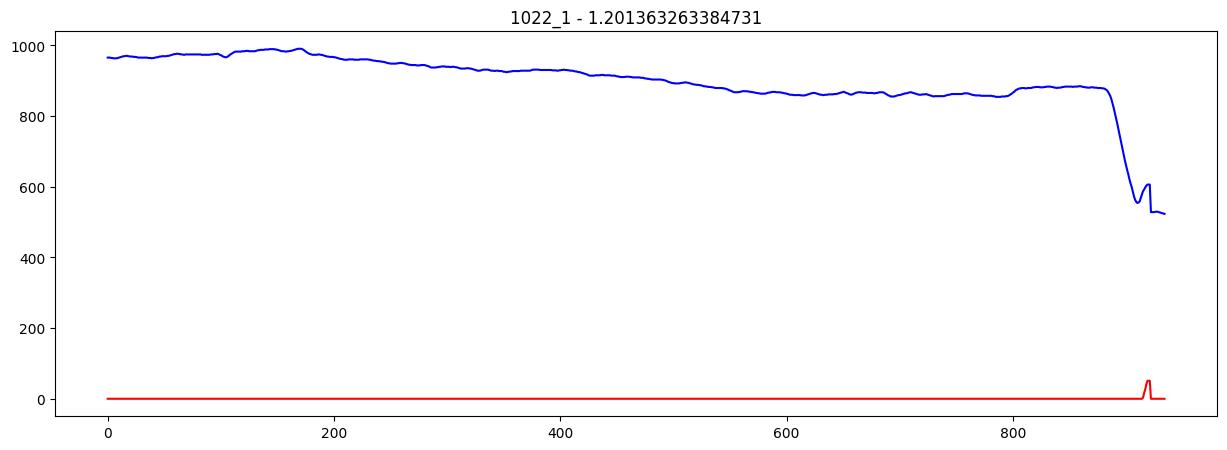

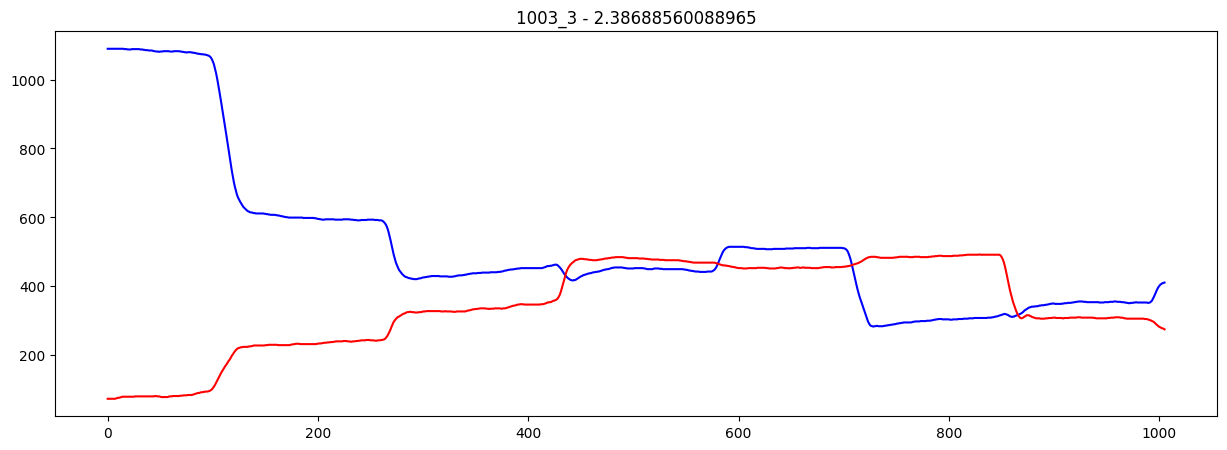

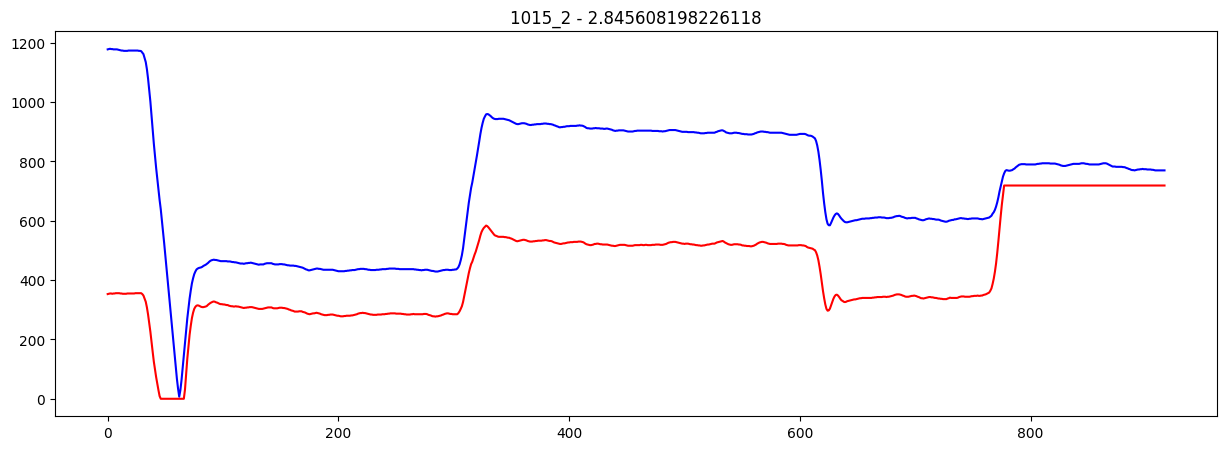

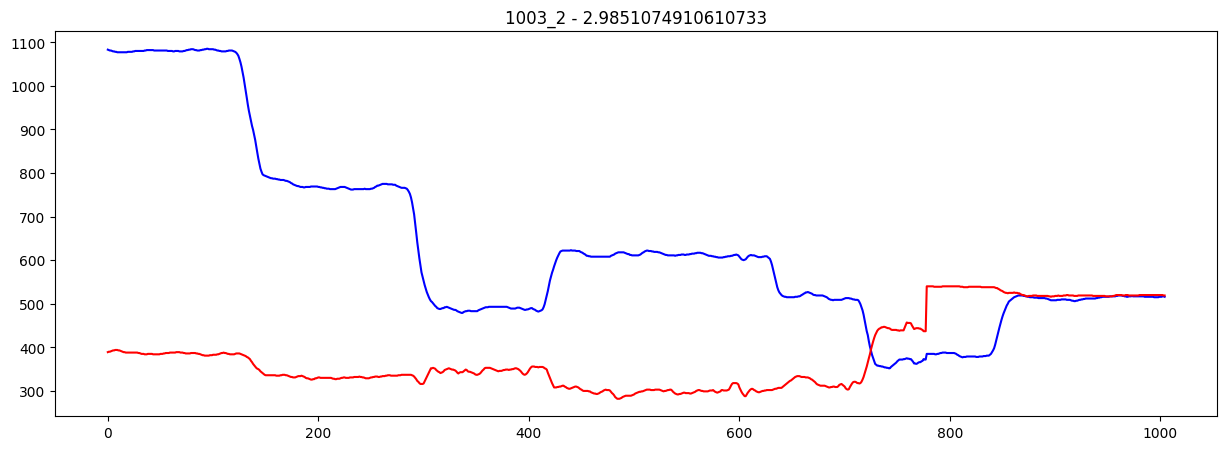

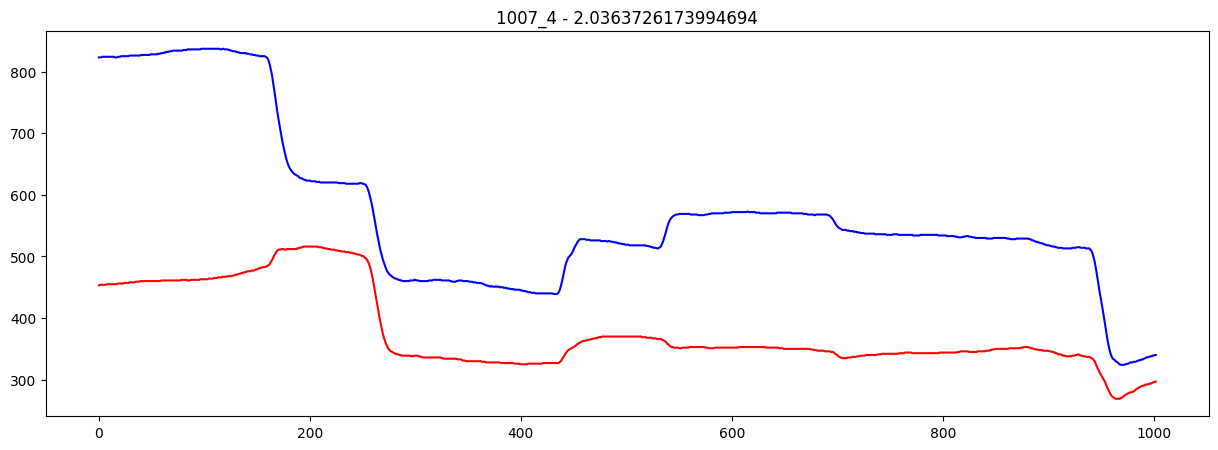

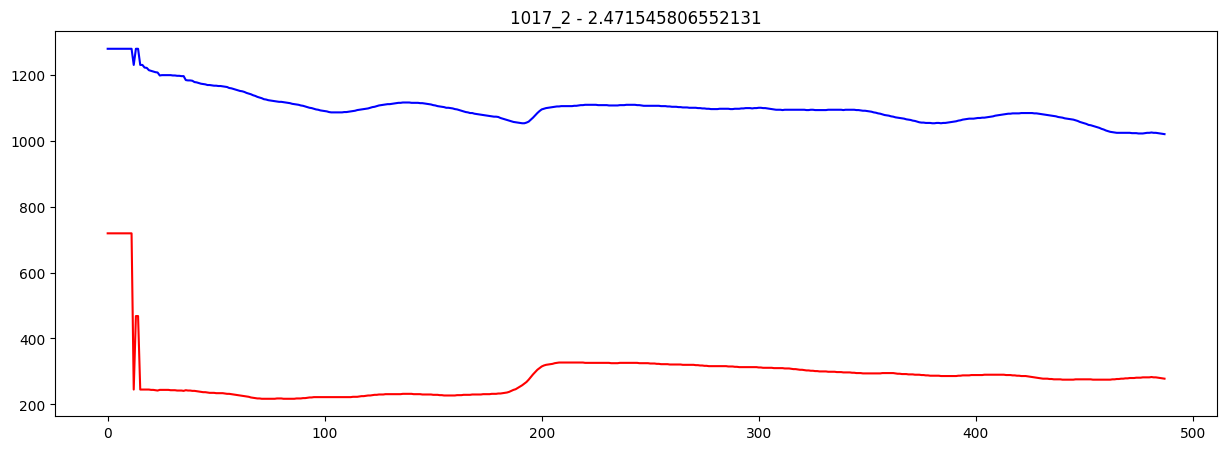

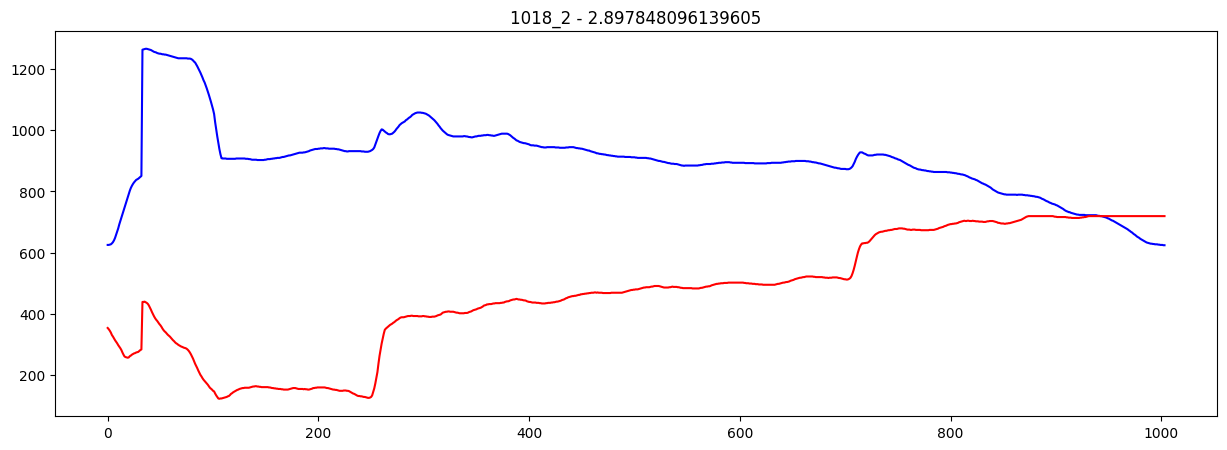

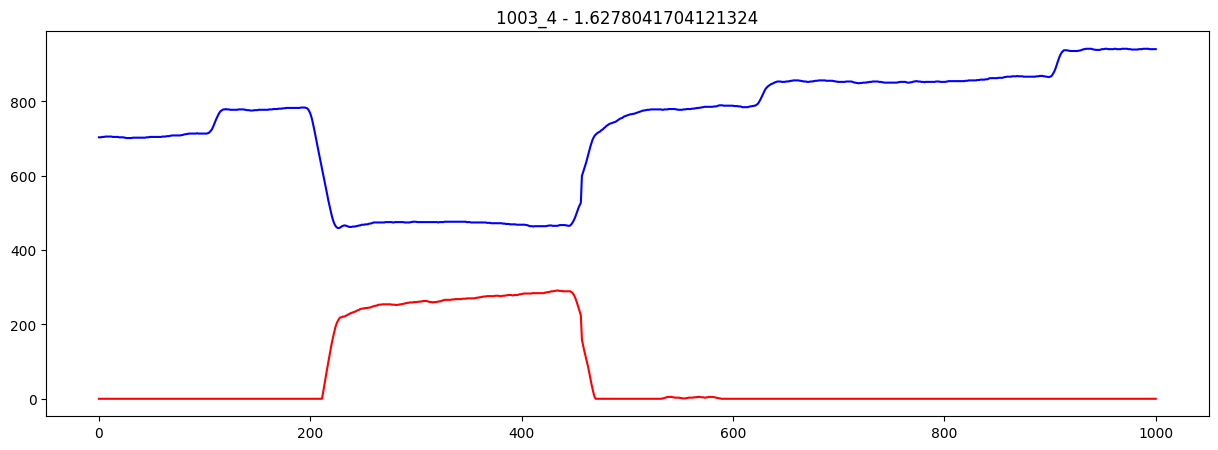

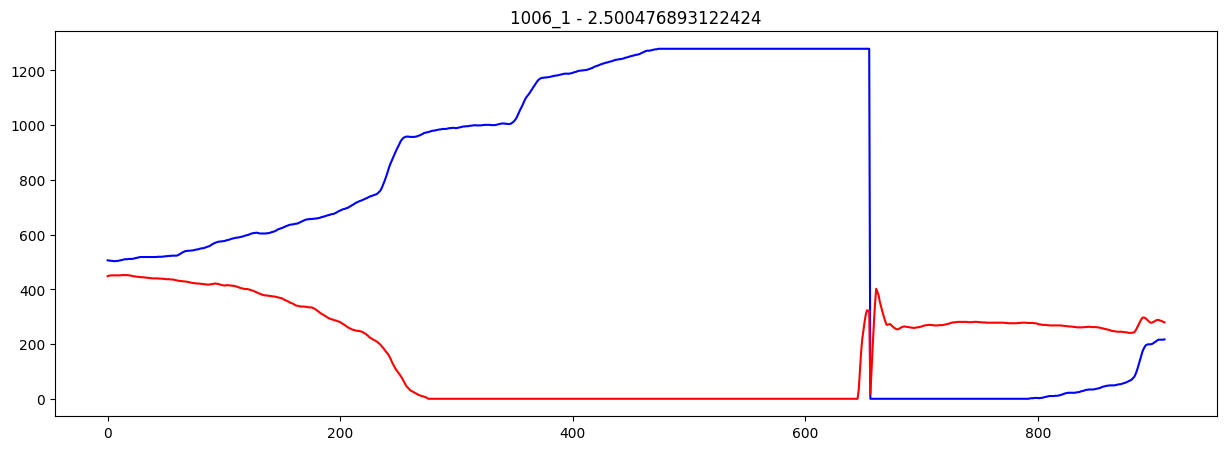

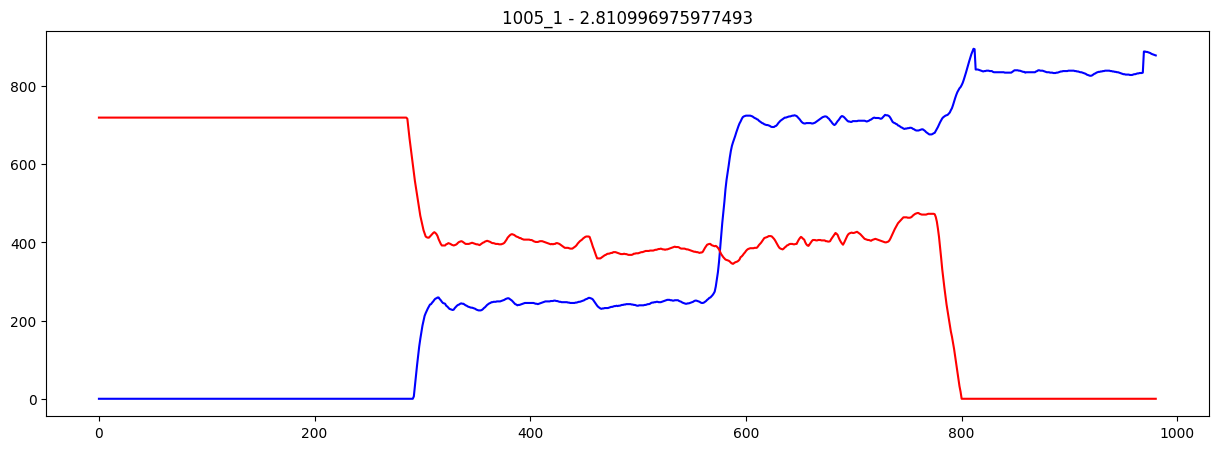

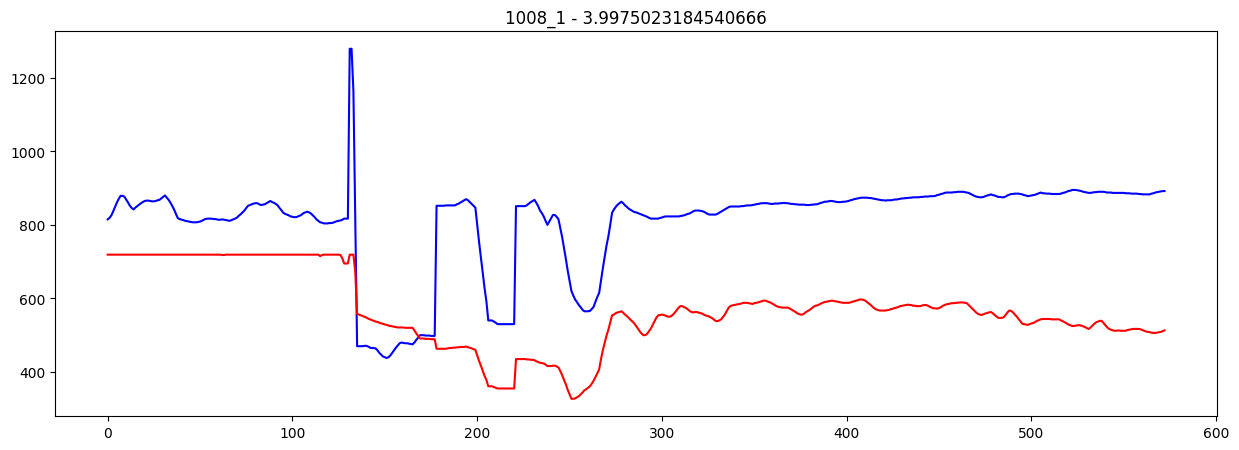

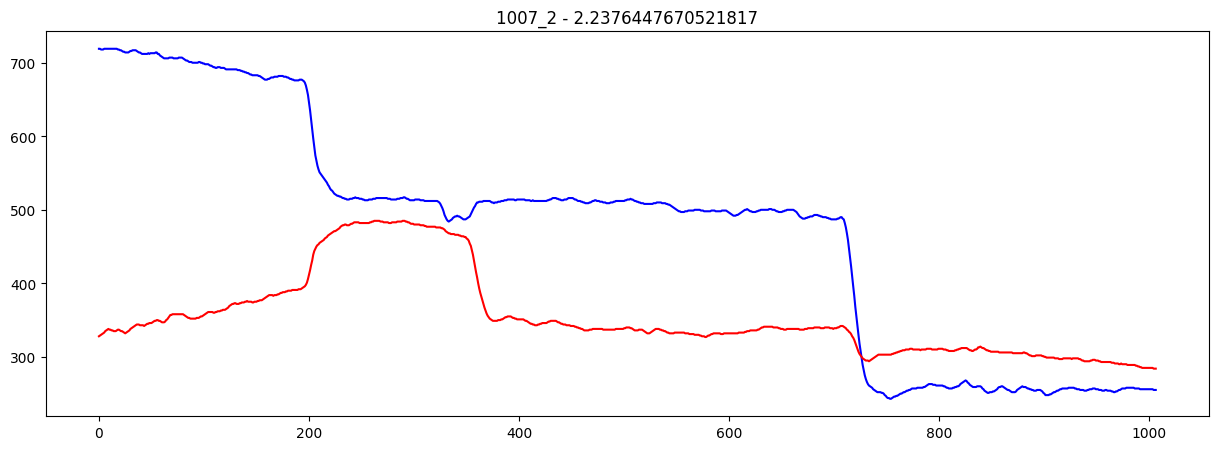

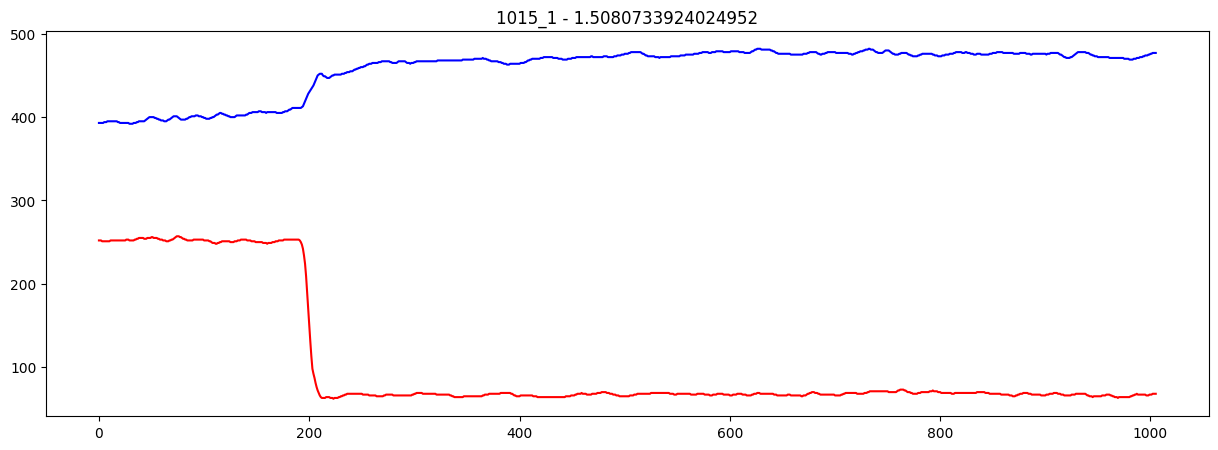

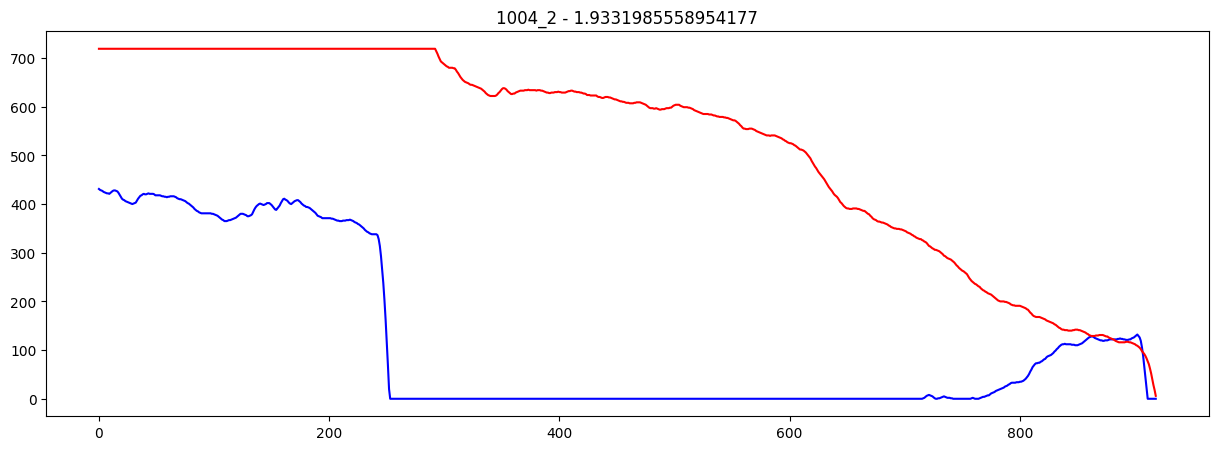

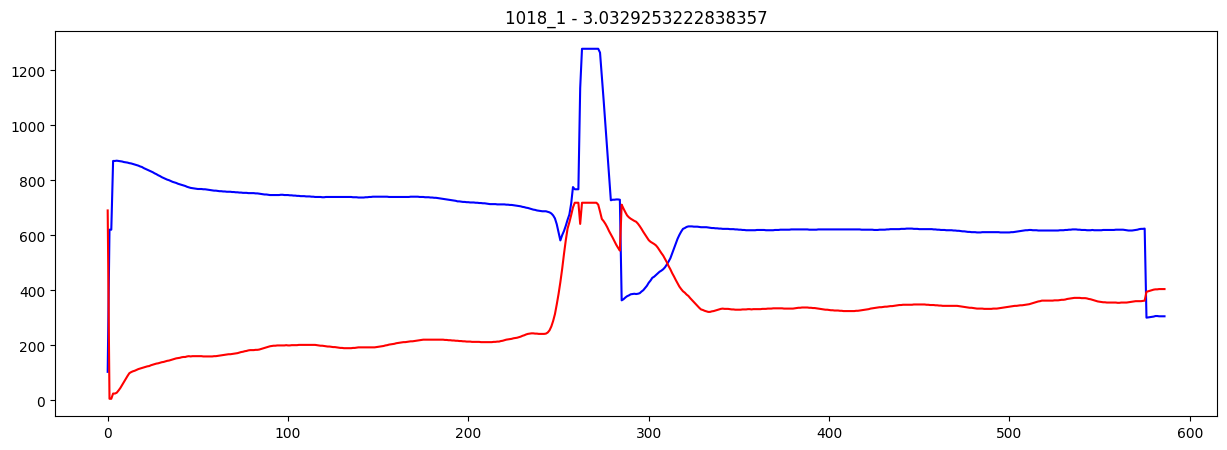

In [36]:
trial = "Freeviewingstillimage_28.jpg"
this_trial = ImageTrial(root, trial, "smaps")
a = this_trial.load_trial_img()
a = np.pad(a, ((240, 240), (320, 320), (0, 0)), 'constant')

from scipy.signal import medfilt

for i in cvi_ids:
    sub = Subject(root, i)
    data, fr = sub.extract_data(trial, vel=False)
    # smooth the data using median filter scipy
    if len(data.shape) < 2:
        continue
    #data[:, 0] = medfilt(data[:, 0], kernel_size=9)
    #data[:, 1] = medfilt(data[:, 1], kernel_size=9)
    out = sub.extract_fixations(trial_name=trial)

    #plt.figure(figsize=(15, 15))
    #plt.imshow(a)
    #plt.plot(data[:, 0], data[:, 1], color='blue', linewidth=2)
    #for fixation in out:
    #    fix = fixation["data"]
    #    if len(fix) < 2:
    #        continue
    #    plt.plot(fix[:, 0], fix[:, 1], color='red', linewidth=3)
    #plt.show()

    # plot time series
    plt.figure(figsize=(15, 5))
    plt.plot(data[:, 0], color='blue')
    plt.plot(data[:, 1], color="red")
    plt.title(f"{i} - {eye_mov_entropy(data.T)}")
    plt.show()

    # compute shannon entropy
    #print(eye_mov_entropy(data.T))
    #data = np.diff(data, axis=0)
    #print(shannon_entropy(data[:, 0]))
    #print(shannon_entropy(data[:, 1]))